# Image formation and enhancement

## Note to self: activities are incomplete, please re-edit this when free

## Creating synthetic images

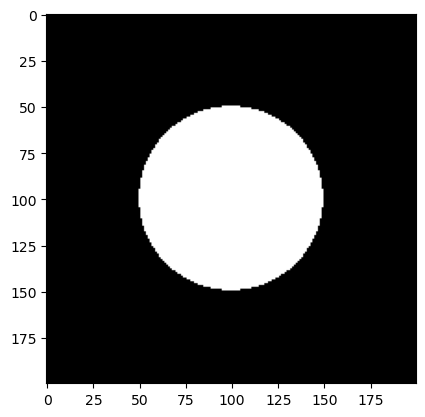

In [2]:
import numpy as np
import matplotlib.pyplot as plt
N = 200 #the higher num is the finer
x = np.linspace(-1,1,num = N)
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R))
A[np.where(R<0.5)] = 1.0
#display as an image
plt.imshow(A, cmap = "gray")

In [3]:
#display as a 3D surface in Cartesian coordinates
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,A)

<Figure size 640x480 with 0 Axes>

# Class Notes

In [4]:
import skimage
import scipy
import numpy as np 
import matplotlib.pyplot as plt

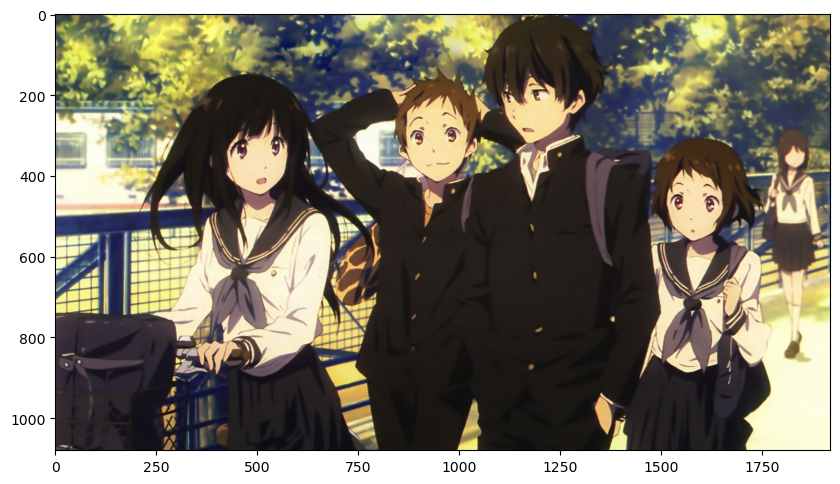

In [5]:
file = "./Pictures/hyouka.jpg"
img = skimage.io.imread(file)
fig, ax = plt.subplots(figsize = (10,7))
ax.imshow(img)

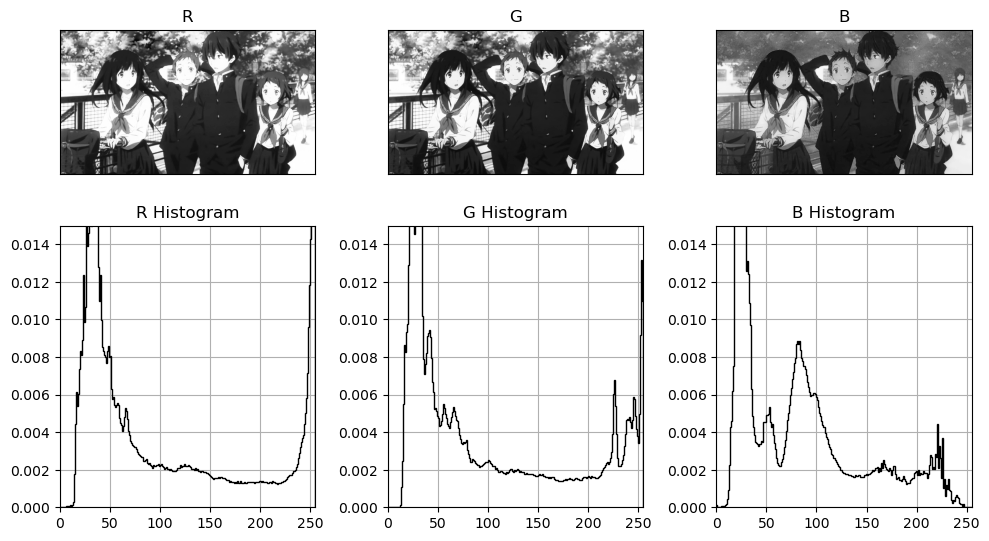

In [6]:
fig, ax_channels = plt.subplots(2,3, figsize = (10,6))

channel_names = ['R','G','B']
hist_names = [i + ' Histogram' for i in channel_names]

binning = np.arange(256)

for i, ax in enumerate(ax_channels.T):
    im_ax, hist_ax = ax

    im_ax.imshow(img[:,:,i], cmap = "Greys_r")
    im_ax.set(**{'xticks':[],'yticks':[], 'title': channel_names[i]})
    
    hist_ax.hist(img[:,:,i].flatten(),
                bins = binning, color = 'black',
                histtype = 'step', density = True)
    hist_ax.set_ylim(0,0.015)
    hist_ax.set_xlim(binning.min(), binning.max())
    hist_ax.grid()
    hist_ax.set_title(hist_names[i])
    
    fig.tight_layout()

# Histogram Backprojection

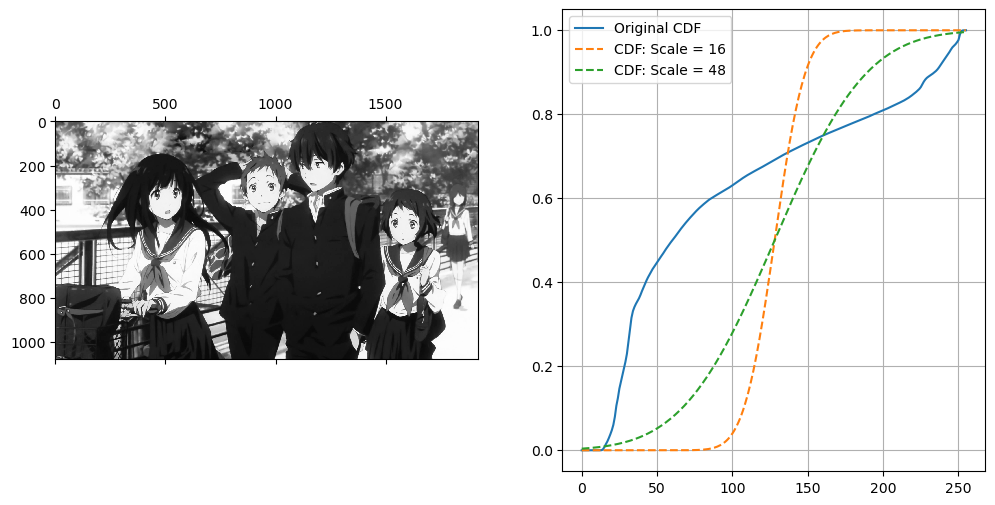

In [7]:
img2gray = skimage.color.rgb2gray(img)
img2gray_8bit = skimage.util.img_as_ubyte(img2gray)

binplus1 = np.arange(0,257)

vals, bins_aux = np.histogram(img2gray_8bit, bins = binplus1, density = True)

fig, ax = plt.subplots(1,2, figsize = (12,6))

ax[0].matshow(img2gray_8bit, cmap = 'Greys_r')
ax[1].plot(binning, vals.cumsum(), label = "Original CDF")

cdf1 = scipy.stats.norm.cdf(binning, loc = len(binning)/2, scale = 16)
cdf2 = scipy.stats.norm.cdf(binning, loc = len(binning)/2, scale = 48)
ax[1].plot(binning,cdf1, label = 'CDF: Scale = 16', ls = '--')
ax[1].plot(binning,cdf2, label = 'CDF: Scale = 48', ls = '--')

ax[1].grid()
ax[1].legend()


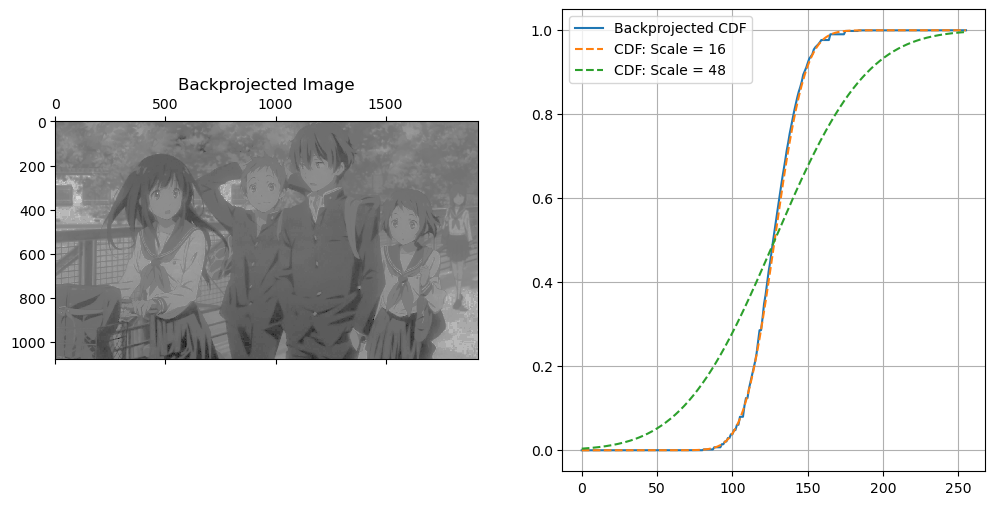

In [9]:
cdf = vals.cumsum()
interp_1 = scipy.interpolate.interp1d(binning, cdf, fill_value="extrapolate")
interp_2 = scipy.interpolate.interp1d(cdf1, binning, fill_value="extrapolate")

cdf1img = img2gray_8bit.copy()

for row in cdf1img:
    for i in range(len(row)):
        row[i] = np.floor( interp_2( interp_1( row[i]))).astype(int)

binplus1 = np.arange(0,257)

vals2, bins_aux = np.histogram(cdf1img, bins = binplus1, density = True)

fig, ax = plt.subplots(1,2, figsize = (12,6))

ax[0].matshow(cdf1img, cmap = 'Greys_r')
ax[0].set_title("Backprojected Image")
ax[1].plot(binning, vals2.cumsum(), label = "Backprojected CDF")

cdf1 = scipy.stats.norm.cdf(binning, loc = len(binning)/2, scale = 16)
ax[1].plot(binning,cdf1, label = 'CDF: Scale = 16', ls = '--')
ax[1].plot(binning,cdf2, label = 'CDF: Scale = 48', ls = '--')

ax[1].grid()
ax[1].legend()
